# Homework 3

In [208]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.metrics import mutual_info_score, mean_squared_error
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression, Ridge

import matplotlib.pyplot as plt
import seaborn as sn

### Data preparation

* Select only the features from above and fill in the missing values with 0.
* Create a new column `rooms_per_household` by dividing the column `total_rooms` by the column `households` from dataframe. 
* Create a new column `bedrooms_per_room` by dividing the column `total_bedrooms` by the column `total_rooms` from dataframe. 
* Create a new column `population_per_household` by dividing the column `population` by the column `households` from dataframe.

In [2]:
def load_data(path='data/housing.csv'):
    
    df = pd.read_csv('data/housing.csv')

    columns = ['latitude',
                'longitude',
                'housing_median_age',
                'total_rooms',
                'total_bedrooms',
                'population',
                'households',
                'median_income',
                'median_house_value',
                'ocean_proximity']
    
    df = df[columns].fillna(0)
    
    df['rooms_per_household'] = df['total_rooms'] / df['households']
    df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
    df['population_per_household'] = df['population'] / df['households']
    
    return df
    

In [3]:
df = load_data()

## Question 1


In [4]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Most common value: <1H OCEAN     9136

## Question 2

In [16]:
def split(df):
    df_full_train, df_test = train_test_split(df, train_size=0.8, random_state=42)
    df_train, df_val = train_test_split(df_full_train, train_size=0.75, random_state=42)

    y_train = df_train.median_house_value.to_list()
    y_val = df_val.median_house_value.to_list()
    y_test = df_test.median_house_value.to_list()

    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    return df_train, y_train, df_val, y_val, df_test, y_test



In [17]:
df_train, y_train, df_val, y_val, df_test, y_test = split(df)

In [20]:
df_train.corr()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,rooms_per_household,bedrooms_per_room,population_per_household
latitude,1.000000,-0.925005,0.002477,-0.025914,-0.059730,-0.100272,-0.063529,-0.076805,0.119118,-0.124507,-0.002301
longitude,-0.925005,1.000000,-0.099812,0.036449,0.063840,0.091670,0.049762,-0.016426,-0.034814,0.102320,0.011022
housing_median_age,0.002477,-0.099812,1.000000,-0.363522,-0.324156,-0.292476,-0.306119,-0.119591,-0.181275,0.129456,0.012167
total_rooms,-0.025914,0.036449,-0.363522,1.000000,0.931546,0.853219,0.921441,0.198951,0.168926,-0.194185,-0.029452
total_bedrooms,-0.059730,0.063840,-0.324156,0.931546,1.000000,0.877340,0.979399,-0.009833,0.010381,0.078094,-0.034301
population,-0.100272,0.091670,-0.292476,0.853219,0.877340,1.000000,0.906841,-0.000849,-0.076210,0.031592,0.064998
households,-0.063529,0.049762,-0.306119,0.921441,0.979399,0.906841,1.000000,0.011925,-0.085832,0.058004,-0.032522
median_income,-0.076805,-0.016426,-0.119591,0.198951,-0.009833,-0.000849,0.011925,1.000000,0.394154,-0.616617,-0.000454
rooms_per_household,0.119118,-0.034814,-0.181275,0.168926,0.010381,-0.076210,-0.085832,0.394154,1.000000,-0.500589,0.001801
bedrooms_per_room,-0.124507,0.102320,0.129456,-0.194185,0.078094,0.031592,0.058004,-0.616617,-0.500589,1.000000,-0.002851


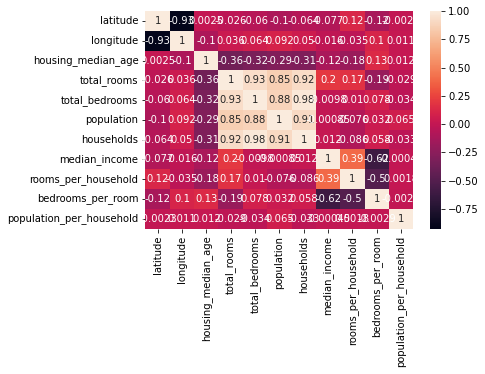

In [27]:
sn.heatmap(df_train.corr(), annot=True)
plt.show()

In [65]:
def get_corr_list(df: pd.DataFrame, top: int = 5) -> pd.DataFrame:
    
    df_corr = df.corr().stack().reset_index()
    df_corr.columns = ['feature_1', 'feature_2', 'coeff']
    df_corr = df_corr[df_corr.feature_1 != df_corr.feature_2]
    df_corr['features'] = df_corr.apply(lambda x: '-'.join(sorted([x.feature_1, x.feature_2])), axis=1)

    df_corr = df_corr.drop_duplicates(subset='features')

    
    df_corr = df_corr.sort_values(by=['coeff'], ascending=(top<0)).head(abs(top))
    
    return df_corr[['features', 'coeff']]

In [70]:
get_corr_list(df_train, top=2)

,features,coeff
50,households-total_bedrooms,0.979399
37,total_bedrooms-total_rooms,0.931546


In [71]:
get_corr_list(df_train, top=-2)

,features,coeff
1,latitude-longitude,-0.925005
86,bedrooms_per_room-median_income,-0.616617


## Question 3

In [120]:
def binarize(feature: list, full_y_mean):
    return list((np.array(feature) > full_y_mean).astype(int))    

In [115]:
train_above_average = binarize(y_train, df)
round(mutual_info_score(df_train.ocean_proximity, above_average),2)

0.1

## Question 4

In [204]:
def vectorize(df_x: pd.DataFrame, dv: DictVectorizer, fit_vectorizer=False):
    
    x_dicts = df_x.to_dict(orient='records')
    
    if fit_vectorizer:
        dv.fit(x_dicts)
    
    x = dv.transform(x_dicts)
    
    return x

def preprocess(df_x: pd.DataFrame, y: list, full_y_mean: float, dv: DictVectorizer, fit_vectorizer=False):
    
    x = vectorize(df_x, dv, fit_vectorizer)
    y_binarized = binarize(y, full_y_mean)
    
    return x, y_binarized

In [132]:
def get_accuracy(y: np.array, preds: np.array):
    return sum(y == preds)/len(preds)
    

In [133]:
# y_mean on full dataset
y_mean = df.median_house_value.mean()
dv = DictVectorizer(sparse=False)

x_train, train_above_average = preprocess(df_train, y_train, y_mean, dv, fit_vectorizer=True)
x_val, val_above_average = preprocess(df_val, y_val, y_mean, dv)

dv.get_feature_names()

/opt/miniconda3/envs/ml-zoomcamp/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['bedrooms_per_room',
 'households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity=<1H OCEAN',
 'ocean_proximity=INLAND',
 'ocean_proximity=ISLAND',
 'ocean_proximity=NEAR BAY',
 'ocean_proximity=NEAR OCEAN',
 'population',
 'population_per_household',
 'rooms_per_household',
 'total_bedrooms',
 'total_rooms']

In [137]:
def train_and_evaluate(x_train: list[list], y_train: list, x_val: list[list], y_val: list) -> float:

    model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
    model.fit(x_train, y_train)

    val_preds = model.predict(x_val)

    return get_accuracy(y=np.array(y_val), preds=val_preds)

In [138]:
print(f' Validation accuracy is: {round(train_and_evaluate(x_train, train_above_average, x_val, val_above_average) ,2)}')

 Validation accuracy is: 0.84


## Question 5

In [202]:
def feature_elimination(train_df, train_y, val_df, val_y, y_mean, permute_features=['total_rooms', 'total_bedrooms', 'population', 'households']):
    
    # Calculate original accuracy.
    dv = DictVectorizer(sparse=False)
    x_train, train_above_average = preprocess(train_df, train_y, y_mean, dv, fit_vectorizer=True)
    x_val, val_above_average = preprocess(val_df, val_y, y_mean, dv)

    ref_accuracy = train_and_evaluate(x_train, train_above_average, x_val, val_above_average)
    
    print(f"{'Feature eliminated' : <20}{'accuracy' : ^15}{'difference' : >15}")
    print(f"{'-' : <20}{round(ref_accuracy,4) : ^15}{'-' : >15}")
    
    # Eliminate features and calculate accuracy.
    for feature in permute_features:
        df_train = train_df.copy()
        df_val = val_df.copy()
        
        del df_train[feature]
        del df_val[feature]
        
        dv = DictVectorizer(sparse=False)
        
        x_train, train_above_average = preprocess(df_train, y_train, y_mean, dv, fit_vectorizer=True)
        x_val, val_above_average = preprocess(df_val, y_val, y_mean, dv)
        
        accuracy = train_and_evaluate(x_train, train_above_average, x_val, val_above_average)
        
        print(f"{feature : <20}{round(accuracy,4) : ^15}{round(ref_accuracy - accuracy,4) : >15}")

In [203]:
y_mean = df.median_house_value.mean()
feature_elimination(df_train, y_train, df_val, y_val, y_mean)

Feature eliminated     accuracy         difference
-                       0.8375                   -
total_rooms              0.837              0.0005
total_bedrooms          0.8355              0.0019
population              0.8263              0.0111
households              0.8336              0.0039


total_rooms has the smalles difference.

## Question 6

In [209]:
def train_and_evaluate_ridge(df_train, y_train, df_val, y_val, a):
    
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(x_train, y_train)
    
    preds = model.predict(x_val)
    
    return mean_squared_error(preds, y_val, squared=False)
    

In [221]:
# Load
df = load_data()
df_train, y_train, df_val, y_val, df_test, y_test = split(df)

# Vectorize
dv = DictVectorizer(sparse=False)
x_train = vectorize(df_train, dv, fit_vectorizer=True)
x_val = vectorize(df_val, dv)

# Log transform
y_train = np.log1p(y_train)
y_val = np.log1p(y_val)

print(f"{'alpha' : <10}{'rmse' : >10}")

for a in [0, 0.01, 0.1, 1, 10]:
    rmse = train_and_evaluate_ridge(df_train, y_train, df_val, y_val, a)
    print(f"{a: <10}{round(rmse, 3): >10}")


alpha           rmse
0              0.524
0.01           0.524
0.1            0.524
1              0.524
10             0.524
